In [1]:
#Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import seaborn as sns

In [2]:
#Loading the data
air_visit = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/air_visit_data.csv')
air_store = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/air_store_info.csv')
hpg_store = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/hpg_store_info.csv')
air_reserve = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/air_reserve.csv')
hpg_reserve = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/hpg_reserve.csv')
store_id = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/store_id_relation.csv')
holiday = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/date_info.csv').rename(columns={'calendar_date':'visit_date'})
sub = pd.read_csv('C:/Users/rashi/Downloads/recruit-restaurant-visitor-forecasting/sample_submission.csv')

Text(0, 0.5, 'Genre')

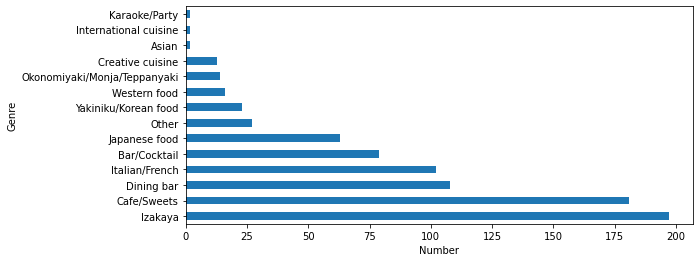

In [3]:
#Genre Plot
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
temp=air_store.groupby("air_genre_name").count()['air_store_id'].sort_values(ascending=False)
temp.plot(kind='barh',width=0.5,ax=ax)
ax.set_yticklabels(temp.sort_values(ascending=False).index,fontsize=10)
plt.xlabel("Number",fontsize=10)
plt.ylabel("Genre",fontsize=10)

Text(0, 0.5, 'Area')

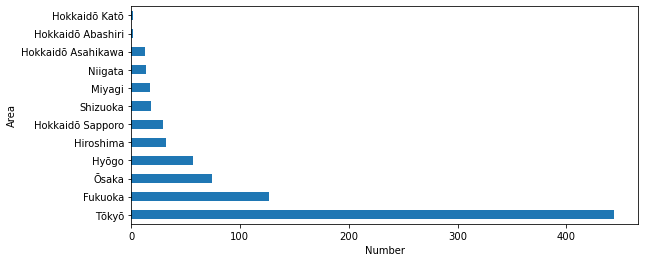

In [4]:
#Area Plot
def split(strng, sep, pos):
    strng = strng.split(sep)
    return sep.join(strng[:pos]), sep.join(strng[pos:])
air_store[['air_area']] = air_store.air_area_name.apply( 
   lambda x: pd.Series(split(str(x), "-", 1)[0]))
air_store = air_store.drop(columns=['air_area_name'])
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
temp=air_store.groupby("air_area").count()['air_store_id'].sort_values(ascending=False)
temp.plot(kind='barh',width=0.5,ax=ax)
ax.set_yticklabels(temp.sort_values(ascending=False).index,fontsize=10)
plt.xlabel("Number",fontsize=10)
plt.ylabel("Area",fontsize=10)

Text(0, 0.5, 'Ave(visitors)')

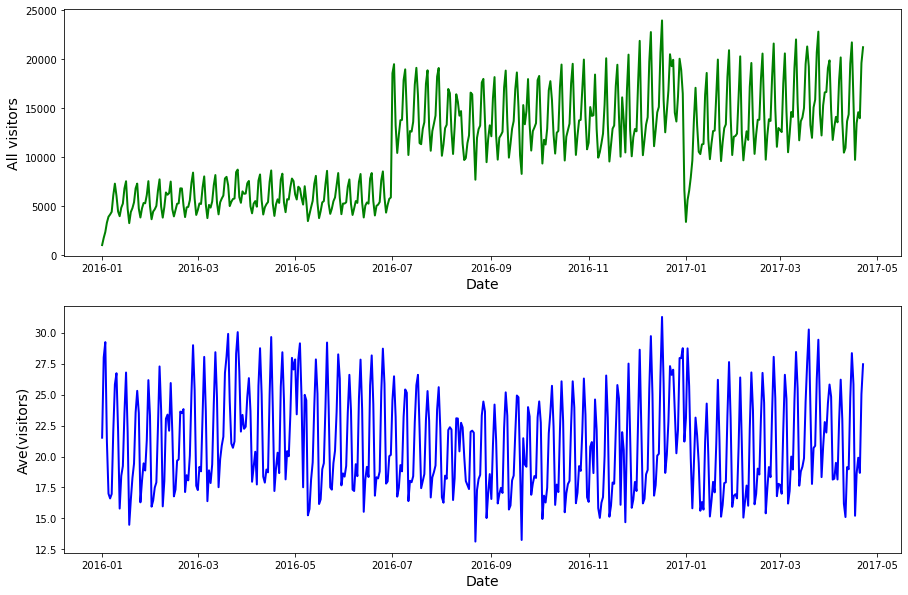

In [5]:
#Visitors Plot
air_visit['visit_date']=pd.to_datetime(air_visit['visit_date'])
air_visit['visit_date']
###Plot1
figure = plt.figure(figsize=(15,10))
ax1 = figure.add_subplot(211)
temp = air_visit.groupby(['visit_date']).sum()
ax1.plot(temp,'green',linewidth=2)
ax1.set_xlabel('Date',fontsize=14)
ax1.set_ylabel('All visitors',fontsize=14)
###Plot2
ax2 = figure.add_subplot(212)
temp = air_visit.groupby(['visit_date']).mean()
ax2.plot(temp.index,temp.values,'blue',linewidth=2)
ax2.set_xlabel('Date',fontsize=14)
ax2.set_ylabel('Ave(visitors)',fontsize=14)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thu'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

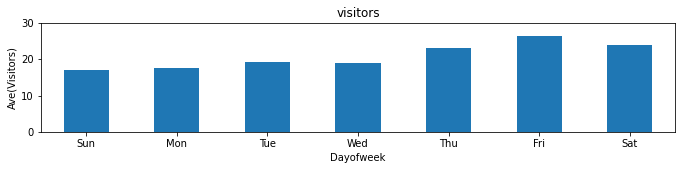

In [6]:
#Visitors by week days
fig = plt.figure(figsize=(25,2))
ax = fig.add_subplot(121)
air_visit["dayofweek"] = air_visit.visit_date.dt.dayofweek
day_p=air_visit.groupby("dayofweek").mean()['visitors']
day_p.plot(kind='bar', figsize=(12,2), legend=None, 
           subplots=True, ax=ax, use_index=False, linewidth=3)
plt.ylim(0,30)
plt.ylabel("Ave(Visitors)",fontsize=10)
plt.xlabel("Dayofweek",fontsize=10)
ax.set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],fontsize=10)
plt.xticks(rotation=0)

(0.0, 200000.0)

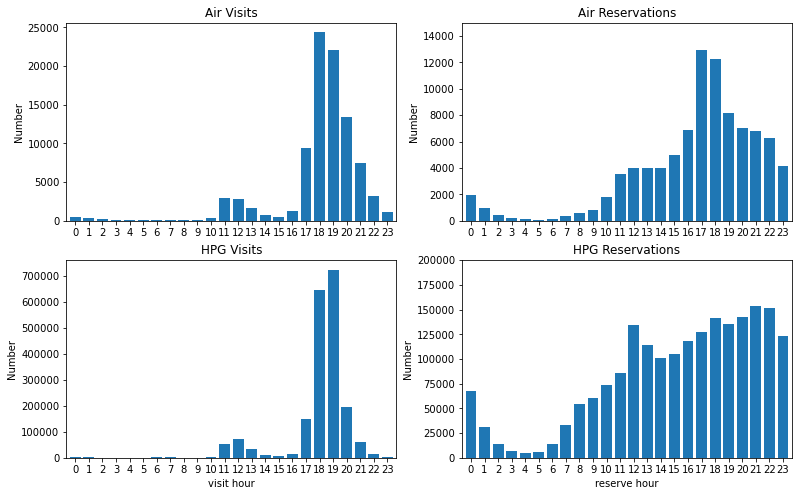

In [7]:
#Visit and Reservation Plot
air_reserve['visit_datetime']=pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime']=pd.to_datetime(air_reserve['reserve_datetime'])
air_reserve['visit_hour']=air_reserve['visit_datetime'].dt.hour
air_reserve['reserve_hour']=air_reserve['reserve_datetime'].dt.hour
hpg_reserve['visit_datetime']=pd.to_datetime(hpg_reserve['visit_datetime'])
hpg_reserve['reserve_datetime']=pd.to_datetime(hpg_reserve['reserve_datetime'])
hpg_reserve['visit_hour']=hpg_reserve['visit_datetime'].dt.hour
hpg_reserve['reserve_hour']=hpg_reserve['reserve_datetime'].dt.hour
fig = plt.figure(figsize=(13,8))
ax=fig.add_subplot(221)
air_reserve.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=0.8, 
                                                                   ax=ax)
plt.xlabel("",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("Air Visits")
plt.xticks(rotation=0)
ax2=fig.add_subplot(222)
air_reserve.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=0.8, 
                                                                     ax=ax2)
plt.xlabel("",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("Air Reservations")
plt.ylim(0,15000)
plt.xticks(rotation=0)
ax3=fig.add_subplot(223)
hpg_reserve.groupby("visit_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                   width=0.8, 
                                                                   ax=ax3)
plt.xlabel("visit hour",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("HPG Visits")
plt.xticks(rotation=0)
ax4=fig.add_subplot(224)
hpg_reserve.groupby("reserve_hour").count()['reserve_visitors'].plot(kind='bar', 
                                                                     width=0.8, 
                                                                     ax=ax4)
plt.xlabel("reserve hour",fontsize=10)
plt.ylabel("Number",fontsize=10)
plt.title("HPG Reservations")
plt.xticks(rotation=0)
plt.ylim(0,200000)